## Reliability of controversy and stupidity annotations

* Correlations between two "experts from the crowd" (each expert is an average of 5 workers)
* For raw data see `Step003OriginalPostStupidityAgreementStudy`

Controversy; Pearson correlation, p-value: (0.77848691316516005, 3.3472336925991979e-09)
Controversy; Spearman correlation, p-value: SpearmanrResult(correlation=0.80411663119254606, pvalue=4.1219247812402244e-10)


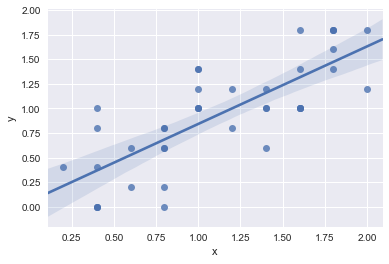

In [1]:
from pandas import DataFrame
import seaborn
import matplotlib.pyplot as plt
import scipy.stats.stats

% matplotlib inline
seaborn.set(color_codes=True)

x_c = [1.4, 0.2, 2.0, 1.8, 0.8, 1.0, 0.8, 1.8, 1.8, 1.0, 0.8, 0.6, 0.8, 1.6, 0.4, 1.2, 0.6, 1.6, 1.2, 1.0, 1.0, 1.6, 1.4,
     0.4, 2.0, 1.6, 0.4, 0.8, 1.6, 0.8, 1.8, 1.6, 1.8, 1.0, 0.4, 1.4, 1.0, 0.4, 0.4, 1.4]
y_c = [1.0, 0.4, 1.2, 1.8, 0.6, 1.0, 0.6, 1.6, 1.8, 1.2, 0.2, 0.6, 0.8, 1.0, 0.0, 1.2, 0.2, 1.4, 0.8, 1.0, 1.0, 1.8, 0.6,
     0.0, 1.8, 1.0, 1.0, 0.0, 1.0, 0.8, 1.8, 1.0, 1.4, 1.4, 0.8, 1.0, 1.4, 0.0, 0.4, 1.2]

print('Controversy; Pearson correlation, p-value:', scipy.stats.stats.pearsonr(x_c, y_c))
print('Controversy; Spearman correlation, p-value:', scipy.stats.stats.spearmanr(x_c, y_c))

seaborn.regplot(x='x', y='y', data=DataFrame(data={'x': x_c, 'y': y_c}), fit_reg=True)
plt.show()

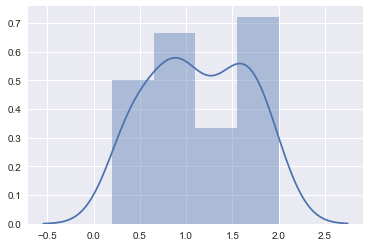

In [2]:
# and distribution of controversy
seaborn.distplot(x_c, bins=4)
plt.show()
# looks quite uniformly distributed

Stupidity; Pearson correlation, p-value: (0.67769249213046867, 1.5589660191060768e-06)
KendalltauResult(correlation=0.5110805167538246, pvalue=3.11613373700659e-05)
SpearmanrResult(correlation=0.64634631189973635, pvalue=6.630801009591189e-06)
0.39370039370059057


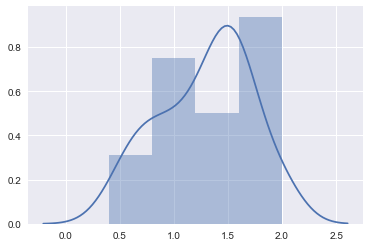

In [3]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# similarly for stupidity
x_s = [1.8, 0.6, 0.4, 1.6, 1.6, 1.6, 2.0, 0.8, 0.6, 1.4, 1.2, 1.2, 1.6, 1.0, 0.6, 1.4, 1.4, 0.8, 1.6, 1.4, 1.6, 0.8, 1.8,
     1.0, 0.6, 1.0, 1.4, 0.8, 1.4, 1.6, 1.4, 1.4, 1.2, 1.6, 2.0, 1.6, 1.6, 1.0, 2.0, 1.2]
y_s = [1.4, 1.0, 0.0, 1.6, 1.4, 1.6, 1.6, 1.6, 0.8, 1.4, 0.6, 1.2, 1.6, 0.8, 0.6, 1.2, 0.8, 1.0, 1.6, 1.8, 1.2, 1.0, 1.2,
     1.0, 1.0, 1.4, 1.6, 0.6, 1.6, 2.0, 1.6, 1.4, 1.0, 1.6, 1.8, 1.6, 1.0, 0.6, 1.8, 2.0]

print('Stupidity; Pearson correlation, p-value:', scipy.stats.stats.pearsonr(x_s, y_s))

print(scipy.stats.stats.kendalltau(x_s, y_s))
print(scipy.stats.stats.spearmanr(x_s, y_s))

rms = sqrt(mean_squared_error(x_c, y_c))
print(rms)

seaborn.distplot(x_s, bins=4)
plt.show()
# so some are stupid (lower values) but mostly reasonable (towards 2.0)


* How stupidity and controversy correlate?

* Controversy
 	* 0, "Not really controversial"
	* 1, "Somehow controversial"
	* 2, "Very controversial"
* Stupidity
	* 0, "Quite stupid"
	* 1, "Neutral"
	* 2, "Quite reasonable"

Pearson correlation, p-value: (-0.26371266658906489, 0.10012885368203565)


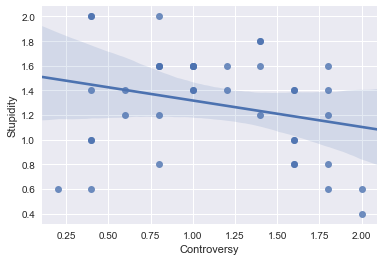

In [4]:
print('Pearson correlation, p-value:', scipy.stats.stats.pearsonr(x_c, x_s))

seaborn.regplot(x='Controversy', y='Stupidity', data=DataFrame(data={'Controversy': x_c, 'Stupidity': x_s}),
                fit_reg=True)
plt.show()

So the correlation is **not** significant (the more conroversial the more stupid).

## Full batch of 1,800 OPs

* These were crowdsourced in the Java project

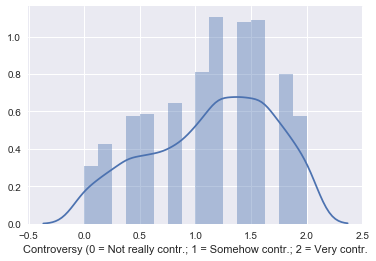

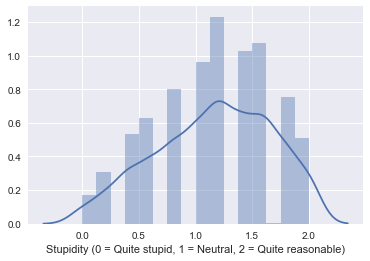

In [5]:
import json


with open('experimental-data/annotated-1800-sampled-balanced-ops-controversy.json') as f:
    controversy_full_map = json.load(f)

controversy_values = list(controversy_full_map.values())

# distribution of controversy
seaborn.distplot(controversy_values, axlabel="Controversy (0 = Not really contr.; 1 = Somehow contr.; 2 = Very contr.")
plt.show()

# and distribution of stupidity 
with open('experimental-data/annotated-1800-sampled-balanced-ops-stupidity.json') as f:
    stupidity_full_map = json.load(f)

stupidity_values = list(stupidity_full_map.values())

# and distribution of controversy
seaborn.distplot(stupidity_values, axlabel="Stupidity (0 = Quite stupid, 1 = Neutral, 2 = Quite reasonable)")
plt.show()

## Stupidity and controversy wrt. AH/delta posts on gold labeled data
* Correlation between stupidity/controversy and AH/non-AH posts

In [6]:
import os

from AnnotatedRedditComment import AnnotatedRedditComment
from RedditThread import RedditThread

# we have the gold labels already loaded
print(list(controversy_full_map)[:10])

main_dir = '/home/user-ukp/data2/cmv-full-2017-09-22/'
all_files = [f for f in os.listdir(main_dir) if os.path.isfile(os.path.join(main_dir, f))]

# OPs with AH or Delta
controversy_result_with_ah = dict()
controversy_result_with_delta = dict()
stupidity_result_with_ah = dict()
stupidity_result_with_delta = dict()

for f in all_files:
    comments = RedditThread.load_comments_from_file(os.path.join(main_dir, f))
    clean_threads = RedditThread.discard_corrupted_threads(RedditThread.reconstruct_threads_from_submission(comments))
    
    if len(clean_threads):
        has_ad_hominem = any([_.has_some_ad_hominem() for _ in clean_threads])
        has_delta = any([_.has_some_delta() for _ in clean_threads])
        # print("Has AH/delta", has_ad_hominem, has_delta, f)
        
        op = clean_threads[0].comments[0]
        assert isinstance(op, AnnotatedRedditComment)
        
        if op.name in controversy_full_map:
            if has_ad_hominem and not has_delta:
                controversy_result_with_ah[op.name] = op
                stupidity_result_with_ah[op.name] = op
            elif has_delta:
                controversy_result_with_delta[op.name] = op
                stupidity_result_with_delta[op.name] = op
                
print(len(controversy_result_with_ah))
print(len(stupidity_result_with_ah))
print(len(controversy_result_with_delta))
print(len(stupidity_result_with_delta))

['t3_4skxx3', 't3_2ffkq1', 't3_4dd1oh', 't3_4usjcq', 't3_34ry0j', 't3_57xyin', 't3_6byh1e', 't3_6b23rm', 't3_64tchq', 't3_2unrvq']


897
897
903
903


...no idea why it's not 900/900 but that's a detail...

Mean controversy AH 1.22901028118
Mean controversy delta 1.06132644272
Ks_2sampResult(statistic=0.12720511709389365, pvalue=7.9724289706733905e-07)


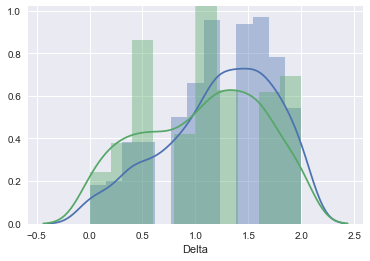

In [7]:
from scipy.stats import ks_2samp
import numpy as np

# op with AH posts - their controversy values
controversy_values_ah = [controversy_full_map[post_name] for post_name in controversy_result_with_ah]
controversy_values_delta = [controversy_full_map[post_name] for post_name in controversy_result_with_delta]

# print mean
print("Mean controversy AH", np.mean(controversy_values_ah))
print("Mean controversy delta", np.mean(controversy_values_delta))

# compute Kolmogorov-Smirnov statistic on 2 samples
print(ks_2samp(controversy_values_ah, controversy_values_delta))

seaborn.distplot(controversy_values_ah, axlabel="AH")
seaborn.distplot(controversy_values_delta, axlabel="Delta")
plt.show()

In general, AH comments are found in more controversial OPs (mean controversy 1.23) while delta-awarded comments in less controversial OPs (mean controversy 1.06); the difference is statistically significant (Kolmogorov-Smirnov test; statistics: 0.13, P-value: 7.97*10-7) (KS test? becuase its non-parametric and we don't know the underlying probability distribution)

The Kolmogorov-Smirnov test used i.e. here: Muchnik, L., Aral, S., & Taylor, S. J. (2014). Social Infuence Bias: A Randomized Experiment. Science, 647(2013), 647–651. http://doi.org/10.1126/science.1240466

Mean stupidity AH 1.20323919237
Mean stupidity delta 1.11474098683
Ks_2sampResult(statistic=0.069397067374822707, pvalue=0.024910357259002612)


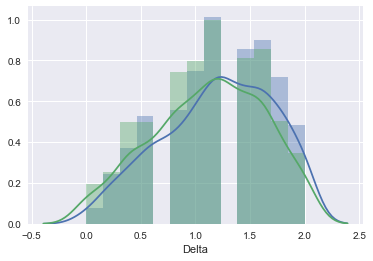

In [8]:
stupidity_values_ah = [stupidity_full_map[post_name] for post_name in stupidity_result_with_ah]
stupidity_values_delta = [stupidity_full_map[post_name] for post_name in stupidity_result_with_delta]

# print mean
print("Mean stupidity AH", np.mean(stupidity_values_ah))
print("Mean stupidity delta", np.mean(stupidity_values_delta))

# compute Kolmogorov-Smirnov statistic on 2 samples
print(ks_2samp(stupidity_values_ah, stupidity_values_delta))

seaborn.distplot(stupidity_values_ah, axlabel="AH")
seaborn.distplot(stupidity_values_delta, axlabel="Delta")
plt.show()

On the other hand, stupidity doesn't seem to play such a role. The difference between AH in stupid OPs (mean 1.20) and delta in stupid OPs (mean 1.11) is not that statistically strong (K-S test; statistics: 0.07, P-value: 0.02)

## How is it with AH level-1 only?

How many submissions with some first-level AHs: 897


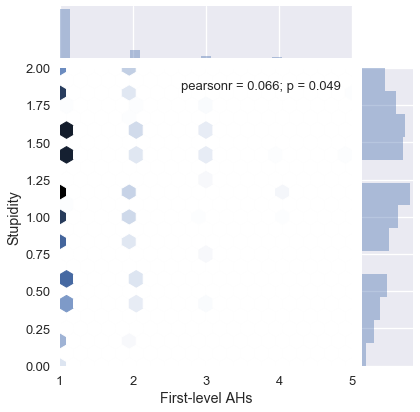

Pearson correlation, p-value: (0.065880464080154647, 0.04855153187286531)


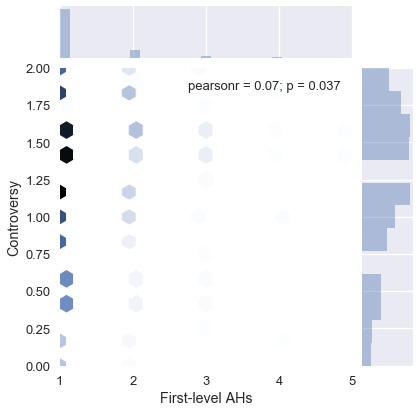

Pearson correlation, p-value: (0.069792235658925741, 0.03662600795312556)


In [9]:
# remember - these are ONLY AH threads!
threads = RedditThread.load_or_unpickle_ad_hominem_threads()
grouped = RedditThread.group_threads_by_original_post(threads)

x_first_level_comments_number = []
y_thread_controversy = []
y_thread_stupidity = []

# get number of first-level AH
for op in grouped:
    comments = RedditThread.collect_all_comments(grouped[op])
    # get first-level only
    first_level_ah = [c for c in comments if c.parent_id == op.name and c.is_ad_hominem]

    # find those with known stupidity and controversy
    if op.name in controversy_result_with_ah and op.name in stupidity_result_with_ah:
        # how many first-level AHs
        x_first_level_comments_number.append(len(first_level_ah))
        y_thread_controversy.append(controversy_full_map[op.name])
        y_thread_stupidity.append(stupidity_full_map[op.name])

# print(x_first_level_comments_number)
# print(y_thread_controversy)
# print(y_thread_stupidity)

print("How many submissions with some first-level AHs:", len(x_first_level_comments_number))

seaborn.set_context("talk")
seaborn.jointplot(x='First-level AHs', y='Stupidity',
                  data=DataFrame(
                      data={'First-level AHs': x_first_level_comments_number, 'Stupidity': y_thread_stupidity}),
                  kind="hex")
plt.show()

print('Pearson correlation, p-value:', scipy.stats.stats.pearsonr(x_first_level_comments_number, y_thread_stupidity))

seaborn.jointplot(x='First-level AHs', y='Controversy', data=DataFrame(
    data={'First-level AHs': x_first_level_comments_number, 'Controversy': y_thread_controversy}),
                  kind="hex")
plt.show()
print('Pearson correlation, p-value:', scipy.stats.stats.pearsonr(x_first_level_comments_number, y_thread_controversy))


* On 897 submissions that have at least one first-level AH argument, we found a slight correlation between the number of first-level AH arguments and controversy of the OP (r = 0.07, p-value = 0.036). Correlation between stupidity of the OP and the number of first-level AH arguments is not significant (p ~ 0.05). We can conclude that neither stupidity nor controversy of the OP is a strong triggering indicator for immediate first-level AH responses.

In [10]:
# How to calculate a confidence interval for Spearman's rank correlation?
# https://stats.stackexchange.com/a/18904
# import math
# r = 0.80
# num = 40
# stderr = 1.0 / math.sqrt(num - 3)
# delta = 1.96 * stderr
# lower = math.tanh(math.atanh(r) - delta)
# upper = math.tanh(math.atanh(r) + delta)
# print("lower %.6f upper %.6f" % (lower, upper))



# Extrapolation experiments
Let's extrapolate to the rest of Reddit using predicted values of controversy for all ~30k OPs. These have to be taken with a grain of salt, though, due to imperfect performance of the controversy/stupidity predictor.


## Do controversial OPs tend to attract more AHs or Deltas?

* Two groups of OPs: submissions with at least one AH; submissions with at least one delta
* For each group, a distribution of controversy

In [11]:
import json

main_dir = '/home/user-ukp/data2/cmv-full-2017-09-22/'
all_files = [f for f in os.listdir(main_dir) if os.path.isfile(os.path.join(main_dir, f))]

# load the extrapolated predictions
with open("experimental-data/op-stupidity-controversy-prediction/controversy-unlabeled-predictions-CNN+LDA.json") as f:
    unlabeled_predictions_controversy = json.load(f)
    
with open("experimental-data/op-stupidity-controversy-prediction/stupidity-unlabeled-predictions-CNN+LDA.json") as f:
    unlabeled_predictions_stupidity = json.load(f)
    
assert isinstance(unlabeled_predictions_controversy, dict)
print("Loaded %d predictions" % len(unlabeled_predictions_controversy))

# list of double values (controversy)
controversy_values_unlabeled_ah = []
controversy_values_unlabeled_delta = []
# and stupidity
stupidity_values_unlabeled_ah = []
stupidity_values_unlabeled_delta = []

for f in all_files:
    comments = RedditThread.load_comments_from_file(os.path.join(main_dir, f))
    clean_threads = RedditThread.discard_corrupted_threads(RedditThread.reconstruct_threads_from_submission(comments))
    
    if len(clean_threads):
        has_ad_hominem = any([_.has_some_ad_hominem() for _ in clean_threads])
        has_delta = any([_.has_some_delta() for _ in clean_threads])
        # print("Has AH/delta", has_ad_hominem, has_delta, f)
        
        op = clean_threads[0].comments[0]
        assert isinstance(op, AnnotatedRedditComment)
        
        # only if we have the prediction
        if op.name in unlabeled_predictions_controversy:
            if has_ad_hominem:
                controversy_values_unlabeled_ah.append(unlabeled_predictions_controversy.get(op.name))
            if has_delta:
                controversy_values_unlabeled_delta.append(unlabeled_predictions_controversy.get(op.name))
        
        if op.name in unlabeled_predictions_stupidity:
            if has_ad_hominem:
                stupidity_values_unlabeled_ah.append(unlabeled_predictions_stupidity.get(op.name))
            if has_delta:
                stupidity_values_unlabeled_delta.append(unlabeled_predictions_stupidity.get(op.name))
        
print("AH submissions with predicted controversy: %d" % len(controversy_values_unlabeled_ah))
print("Delta submissions with predicted controversy: %d" % len(controversy_values_unlabeled_delta))
print("AH submissions with predicted stupidity: %d" % len(stupidity_values_unlabeled_ah))
print("Delta submissions with predicted stupidity: %d" % len(stupidity_values_unlabeled_delta))

Loaded 29999 predictions


AH submissions with predicted controversy: 1267
Delta submissions with predicted controversy: 10861
AH submissions with predicted stupidity: 1267
Delta submissions with predicted stupidity: 10861


Mean controversy AH 1.28458105064
Mean controversy delta 1.17603260708
Ks_2sampResult(statistic=0.12568644739252638, pvalue=4.1525731214040807e-16)


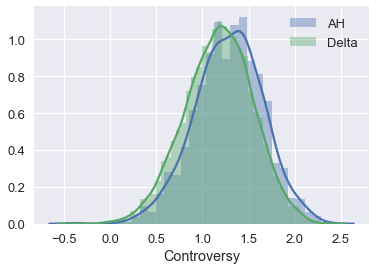

In [16]:
# controversy first
print("Mean controversy AH", np.mean(controversy_values_unlabeled_ah))
print("Mean controversy delta", np.mean(controversy_values_unlabeled_delta))

# compute Kolmogorov-Smirnov statistic on 2 samples
print(ks_2samp(controversy_values_unlabeled_ah, controversy_values_unlabeled_delta))

seaborn.distplot(controversy_values_unlabeled_ah, label="AH", axlabel='Controversy')
seaborn.distplot(controversy_values_unlabeled_delta, label="Delta")
plt.legend()
# plt.show()
plt.savefig('/tmp/out.eps')

Mean stupidity AH 1.35583710928
Mean stupidity delta 1.31100158285
Ks_2sampResult(statistic=0.069902179997553937, pvalue=2.8189799187365388e-05)


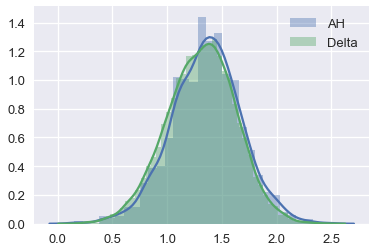

In [13]:
# stupidity second
print("Mean stupidity AH", np.mean(stupidity_values_unlabeled_ah))
print("Mean stupidity delta", np.mean(stupidity_values_unlabeled_delta))

# compute Kolmogorov-Smirnov statistic on 2 samples
print(ks_2samp(stupidity_values_unlabeled_ah, stupidity_values_unlabeled_delta))

seaborn.distplot(stupidity_values_unlabeled_ah, label="AH")
seaborn.distplot(stupidity_values_unlabeled_delta, label="Delta")
plt.legend()
plt.show()

When extrapolated on all held-out submissions that have at least one AH argument (1267 OPs) or at least one Delta argument (10,861 OPs), AH arguments tend to be found under more controversial OPs whereas delta arguments in the less controversial ones (Kolmogorov-Smirnov test; statistics: 0.14, P-value: 1*10-18), based on the quite reasonable performance of controversy predictor (0.569 Spearman's rho; human baseline 0.804).

Results for extrapolated stupidy shows that there is also a significant difference between submissions with AH and with Delta (P-Value: 2*10-5) but given the performance of stupidity predictor (0.385 Spearman's rho, human baseline 0.646) we refer from drawing any conclusions here.